# Clusterização para segmentação dos clientes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

Foi testado em um primeito momento com a profissão, mas verificou-se que o modelo vai considerar a profissão principalmente para separar, logo os atributos relacionados a profissão foi retirados.

In [2]:
seg_clientes = pd.read_csv('seg_clientes_pre.csv')
seg_clientes = seg_clientes.iloc[:,0:8]
seg_clientes.drop('Unnamed: 0',axis=1,inplace=True)
seg_clientes.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,0,0,22,0,1,0,4
1,1,1,67,1,1,0,1
2,0,1,67,1,0,2,2
3,0,1,56,0,0,1,2
4,0,0,32,1,1,0,3


In [3]:
seg_std = StandardScaler().fit_transform(seg_clientes) #normalização dos dados
seg_std

array([[-0.9163725 , -1.25042798, -1.35129866, ..., -0.54814566,
        -0.74129243,  0.69951194],
       [ 1.09125928,  0.79972619,  1.4499595 , ..., -0.54814566,
        -0.74129243, -1.18264413],
       [-0.9163725 ,  0.79972619,  1.4499595 , ..., -0.82984441,
         1.95038705, -0.55525878],
       ...,
       [ 1.09125928,  0.79972619, -0.10629504, ..., -0.82984441,
        -0.74129243, -0.55525878],
       [ 1.09125928, -1.25042798, -0.54204631, ..., -0.54814566,
        -0.74129243, -0.55525878],
       [ 1.09125928, -1.25042798, -0.04404486, ...,  1.70544435,
        -0.74129243,  0.07212658]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

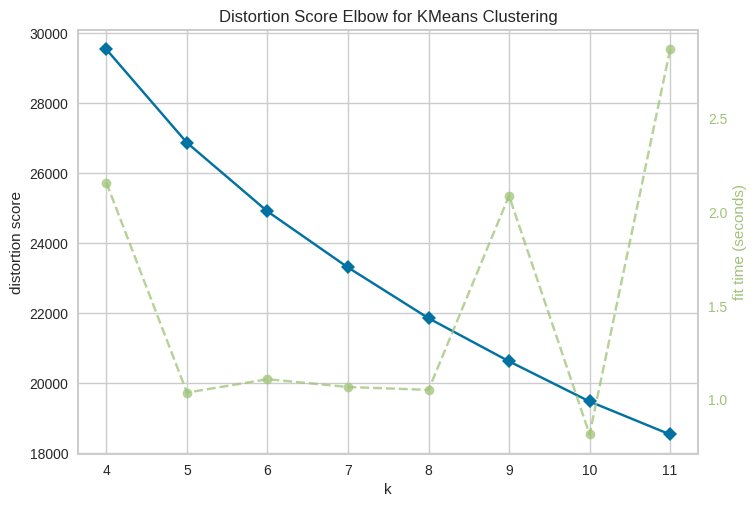

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
model = KMeans()
visualizer_el = KElbowVisualizer(model, k=(4,12))
visualizer_el.fit(seg_std)
visualizer_el.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

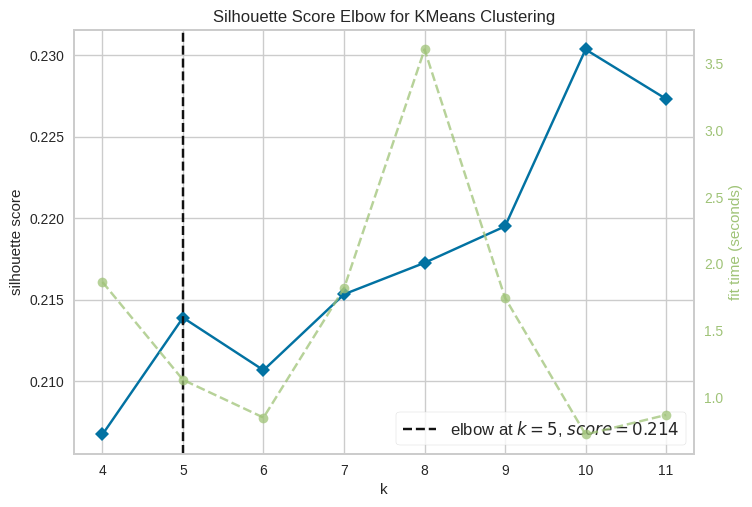

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [5]:
model = KMeans()
visualizer_el = KElbowVisualizer(model, k=(4,12),metric='silhouette')
visualizer_el.fit(seg_std)
visualizer_el.show()

In [6]:
kmeans = KMeans(n_clusters=5).fit(seg_std)
seg_clientes['Cluster'] = kmeans.labels_
seg_clientes.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Cluster
0,0,0,22,0,1,0,4,3
1,1,1,67,1,1,0,1,2
2,0,1,67,1,0,2,2,0
3,0,1,56,0,0,1,2,4
4,0,0,32,1,1,0,3,1


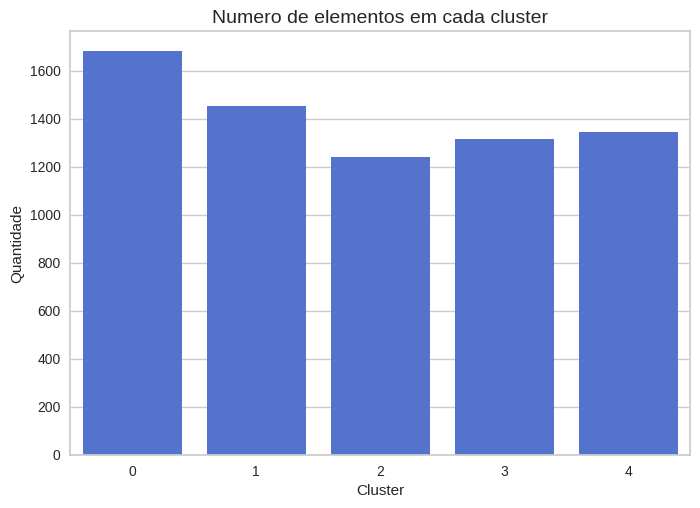

In [19]:
plt.title('Numero de elementos em cada cluster',fontsize=14)
sns.countplot(x='Cluster',data=seg_clientes,color='royalblue')
plt.xlabel('Cluster')
plt.ylabel('Quantidade');

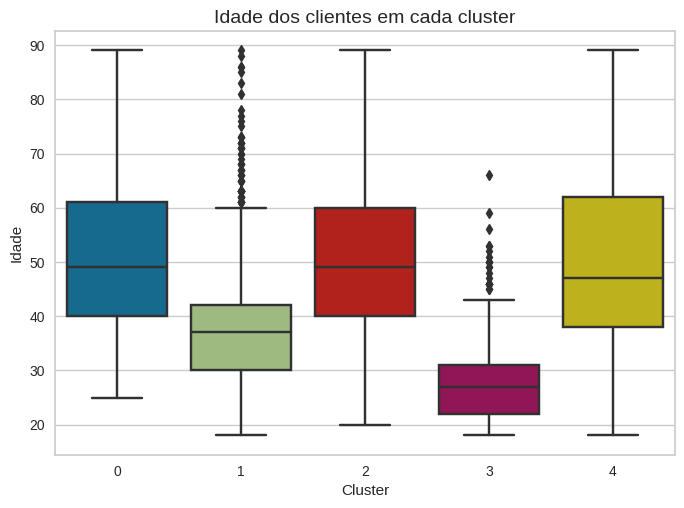

In [20]:
plt.title('Idade dos clientes em cada cluster',fontsize=14)
sns.boxplot(x='Cluster',y='Age',data=seg_clientes)
plt.xlabel('Cluster')
plt.ylabel('Idade');

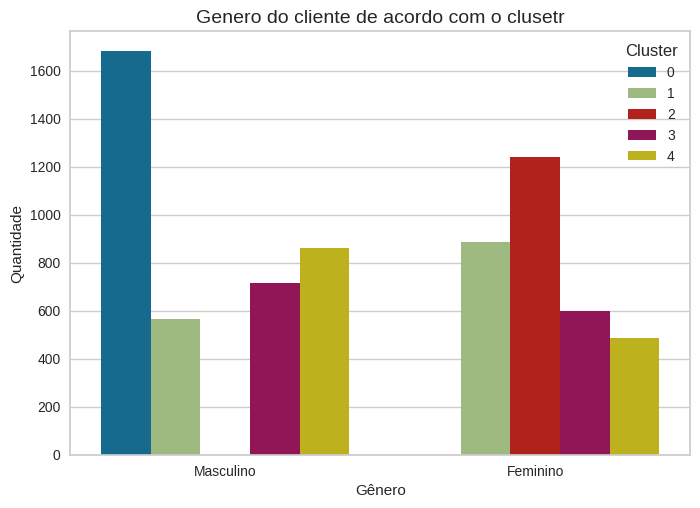

In [28]:
plt.title('Genero do cliente de acordo com o clusetr',
          fontsize=14)
sns.countplot(x='Gender',data=seg_clientes,hue='Cluster')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

ticks, labels = plt.xticks()
plt.xticks(ticks, labels=['Masculino', 'Feminino']);

In [10]:
seg_cli = pd.read_csv('Seg_clientes.csv')
seg_cli.head()

,Unnamed: 0,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
2,3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
3,5,Male,Yes,56,No,Artist,0.0,Average,2.0
4,6,Male,No,32,Yes,Healthcare,1.0,Low,3.0


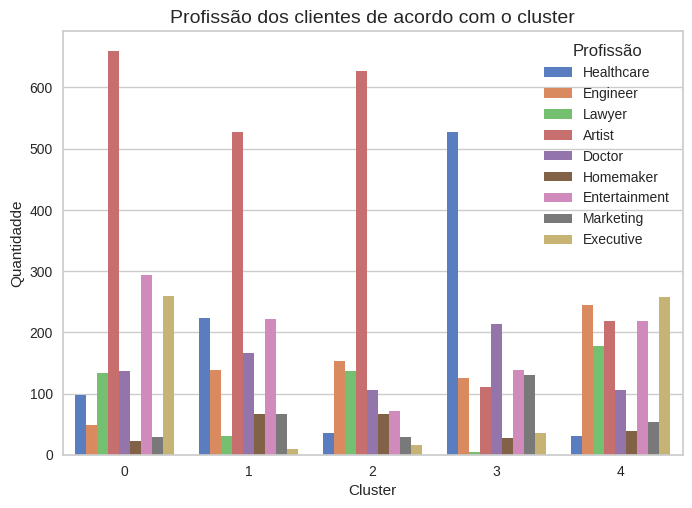

In [25]:
plt.title('Profissão dos clientes de acordo com o cluster',
          fontsize=14)
sns.countplot(hue='Profession',x=seg_clientes['Cluster'],data=seg_cli,palette='muted')
plt.xlabel('Cluster')
plt.ylabel('Quantidadde')
plt.legend(title='Profissão');

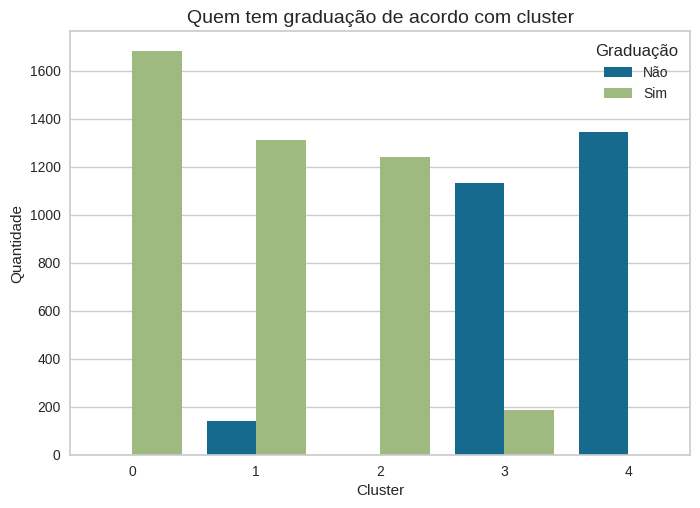

In [26]:
plt.title('Quem tem graduação de acordo com cluster',
          fontsize=14)
sns.countplot(x='Cluster',hue='Graduated',data=seg_clientes)
plt.xlabel('Cluster')
plt.ylabel('Quantidade')
plt.legend(['Não','Sim'],title='Graduação')

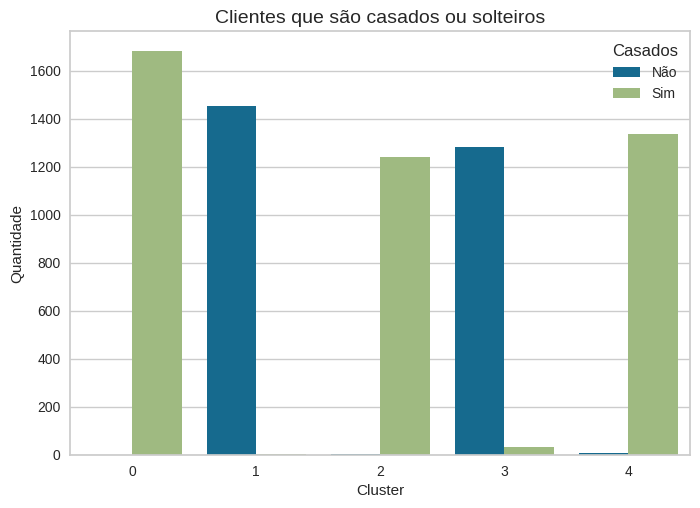

In [27]:
plt.title('Clientes que são casados ou solteiros',
          fontsize=14)
sns.countplot(hue='Ever_Married',x='Cluster',data=seg_clientes)
plt.xlabel('Cluster')
plt.ylabel('Quantidade')
plt.legend(['Não','Sim'],title='Casados')

<Axes: xlabel='Cluster', ylabel='count'>

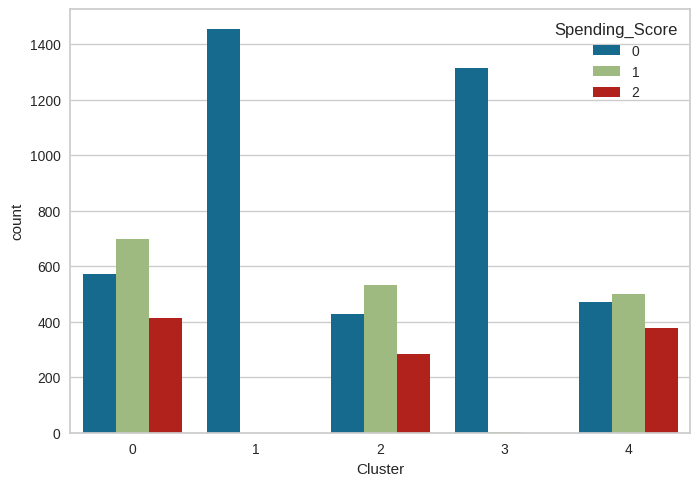

In [14]:
sns.countplot(x='Cluster',hue='Spending_Score',data=seg_clientes)

<Axes: xlabel='Work_Experience', ylabel='count'>

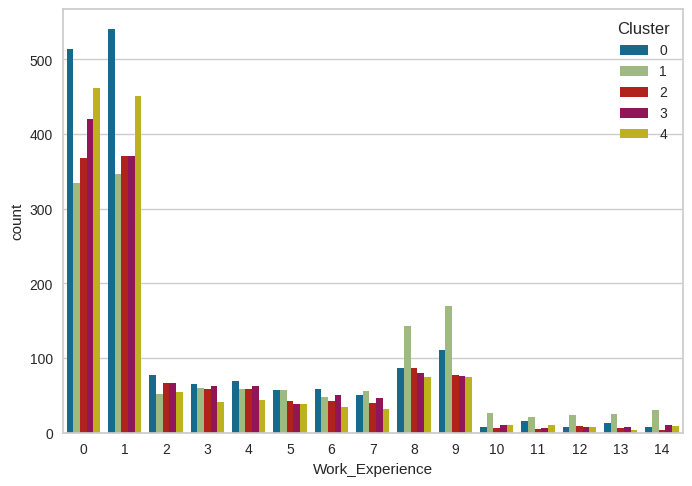

In [15]:
sns.countplot(x='Work_Experience',hue='Cluster',data=seg_clientes)

<Axes: xlabel='Family_Size', ylabel='count'>

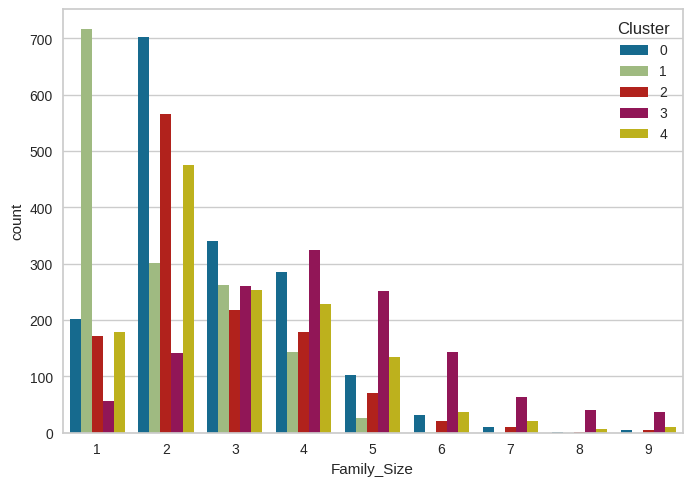

In [16]:

sns.countplot(x='Family_Size',hue='Cluster',data=seg_clientes)

Ficou em 5 clusters, sendo estes:

- Cluster 0
    - Maioria entre 20 e 60 anos
    - Com graduação
    - Casados
    - Tem pelo menos 2 pessoas e casa onde moram
    - Somente pessoa do genero masculino
- Cluster 1
   - 20 a 50 anos em sua maioria
   - Maioria com graduação
   - Solteiros
   - Moram sozinho em sua maioria
   - Tem pontuação baixa
- Cluster 2
  - 20 a 90 anos
  - Tem graduação
  - Somente pessoas do genero feminino
  - Casadas
  - Moram ela e mais uma pessoa pelo menos
- Cluster 3
  - 20 a 40 anos
  - Maioria sem graduação
  - Pontuação baixa
  - Moram ao tottal de 3  a 5 pessoas
  - Em sua maioria trabalham na área da saúde
- Cluster 4
  - 20 a 90 anos
  - Sem graduação
  - Casados
  - 2 pessoa em sua maioria moram em casa (contando o cliente


  Poderia juntar os cluster 0 e 2, pois o que diferencia e apenas o genero, ficando assim

- Cluster 0
    - Maioria entre 20 e 60 anos
    - Com graduação
    - Casados
    - Tem pelo menos 2 pessoas e casa onde moram
- Cluster 1
   - 20 a 50 anos em sua maioria
   - Maioria com graduação
   - Solteiros
   - Moram sozinho em sua maioria
   - Tem pontuação baixa
- Cluster 2
  - 20 a 40 anos
  - Maioria sem graduação
  - Pontuação baixa
  - Moram ao tottal de 3  a 5 pessoas
  - Em sua maioria trabalham na área da saúde

- Cluster 3
  - 20 a 90 anos
  - Sem graduação
  - Casados
  - 2 pessoa em sua maioria moram em casa (contando o cliente).

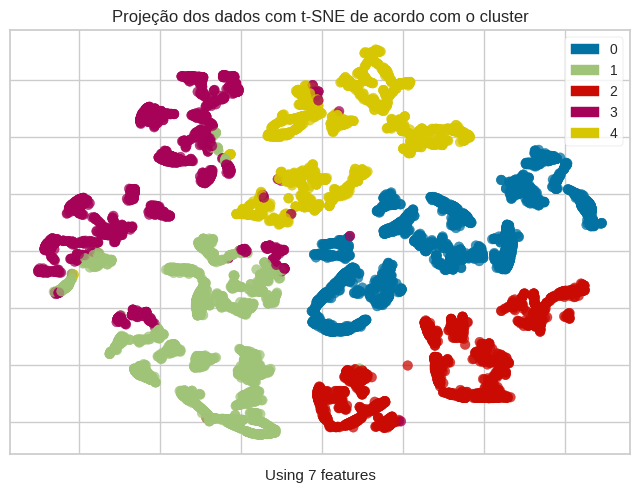

<Axes: title={'center': 'Projeção dos dados com t-SNE de acordo com o cluster'}, xlabel='Using 7 features'>

In [33]:
from yellowbrick.features import Manifold # fazer uma projeção dos dados em 2 dimensões de acorod com o cluster
viz = Manifold(manifold="tsne",title='Projeção dos dados com t-SNE de acordo com o cluster')
viz.fit_transform(seg_std,seg_clientes.Cluster)
viz.show()
